# 问题一解决方案

本notebook用于测试Model_1类的trace_moment方法和可视化功能

In [1]:
# 导入必要的库和模型
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import datetime

# 导入自定义模型
from model_1 import Model_1

In [2]:
# 安装必要的依赖包
import subprocess
import sys

try:
    import openpyxl
    print("openpyxl 已安装")
except ImportError:
    print("正在安装 openpyxl...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "openpyxl"])
    print("openpyxl 安装完成")

openpyxl 已安装


## Question 1

In [4]:
# 创建模型实例
# 根据题目数据设置参数
num_sections = 223  # 板凳龙节数
head_length = 2.86  # 头部长度 (m)
body_length = 1.65  # 身体每节长度 (m)  
distance = 0.55  # 螺距 (m)

model = Model_1(num_sections, head_length, body_length, distance)
print(f"模型创建成功: {num_sections}节板凳龙, 螺距={distance}m")

模型创建成功: 223节板凳龙, 螺距=0.55m


In [4]:
# 测试pos_trace_moment方法
theta_start = 32.0 * pi  # 起始极角
time = 300.0        # 时间 (s)
velocity = 1.0     # 速度 (m/s)
step = 0.01        # 步长

print(f"测试参数:")
print(f"起始极角: {theta_start} rad")
print(f"时间: {time} s")
print(f"速度: {velocity} m/s")
print(f"步长: {step}")

try:
    # 计算各连接点位置
    pos_result = model.pos_trace_moment(theta_start, time, velocity, step)
    positions = pos_result['positions']
    analysis_time = pos_result['time']

    print(f"\n计算得到 {len(positions)} 个连接点位置 (分析时刻: {analysis_time}s):")
    # 只显示前10个位置数据
    for i, pos in enumerate(positions[:10]):
        print(f"点 {i}: θ = {pos:.4f} rad")
    if len(positions) > 10:
        print(f"... (共{len(positions)}个连接点)")

    # 计算当前时刻速度信息
    v_result = model.v_trace_moment(pos_result, velocity)
    
    # 展示v_result结果（模仿pos_result的处理方式）
    if v_result:
        velocities = v_result['velocities']
        v_analysis_time = v_result['time']
        
        print(f"\n计算得到 {len(velocities)} 个连接点速度 (分析时刻: {v_analysis_time}s):")
        # 只显示前10个速度数据
        for i, vel in enumerate(velocities[:10]):
            print(f"点 {i}: 速度 = {vel:.4f} m/s")
        if len(velocities) > 10:
            print(f"... (共{len(velocities)}个连接点)")
except Exception as e:
    print(f"计算过程中发生错误: {e}")

测试参数:
起始极角: 100.53096491487338 rad
时间: 300.0 s
速度: 1.0 m/s
步长: 0.01

计算得到 224 个连接点位置 (分析时刻: 300.0s):
点 0: θ = 57.0271 rad
点 1: θ = 57.5971 rad
点 2: θ = 57.9171 rad
点 3: θ = 58.2371 rad
点 4: θ = 58.5671 rad
点 5: θ = 58.8971 rad
点 6: θ = 59.2271 rad
点 7: θ = 59.5371 rad
点 8: θ = 59.8471 rad
点 9: θ = 60.1571 rad
... (共224个连接点)

计算得到 224 个连接点速度 (分析时刻: 300.0s):
点 0: 速度 = 1.0000 m/s
点 1: 速度 = 0.9997 m/s
点 2: 速度 = 0.9997 m/s
点 3: 速度 = 0.9996 m/s
点 4: 速度 = 0.9996 m/s
点 5: 速度 = 0.9995 m/s
点 6: 速度 = 0.9995 m/s
点 7: 速度 = 0.9994 m/s
点 8: 速度 = 0.9994 m/s
点 9: 速度 = 0.9993 m/s
... (共224个连接点)


开始可视化...


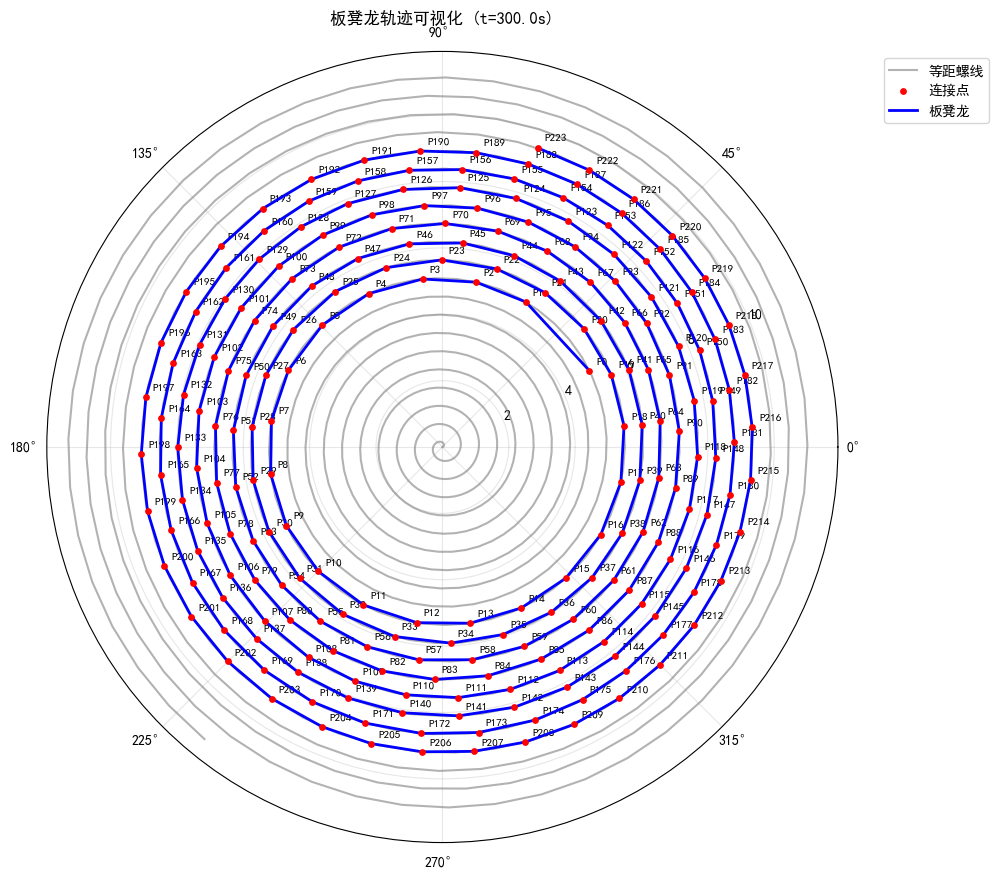

可视化完成!

统计信息:
分析时刻: 300.0s
头部极角: 57.0271 rad
尾部极角: 108.0771 rad
极角范围: 51.0500 rad


In [5]:
# 如果计算成功，进行可视化
if 'pos_result' in locals() and pos_result:
    print("开始可视化...")
    
    # 调用可视化函数，直接传入结果数据
    fig, ax = model.visualize(pos_result)

    print("可视化完成!")
    
    # 打印一些统计信息
    positions = pos_result['positions']
    analysis_time = pos_result['time']
    print(f"\n统计信息:")
    print(f"分析时刻: {analysis_time}s")
    print(f"头部极角: {positions[0]:.4f} rad")
    print(f"尾部极角: {positions[-1]:.4f} rad")
    print(f"极角范围: {max(positions) - min(positions):.4f} rad")
else:
    print("由于计算失败，无法进行可视化")

### Q1 Output
将结果以Excel表格形式输出，样表如下：
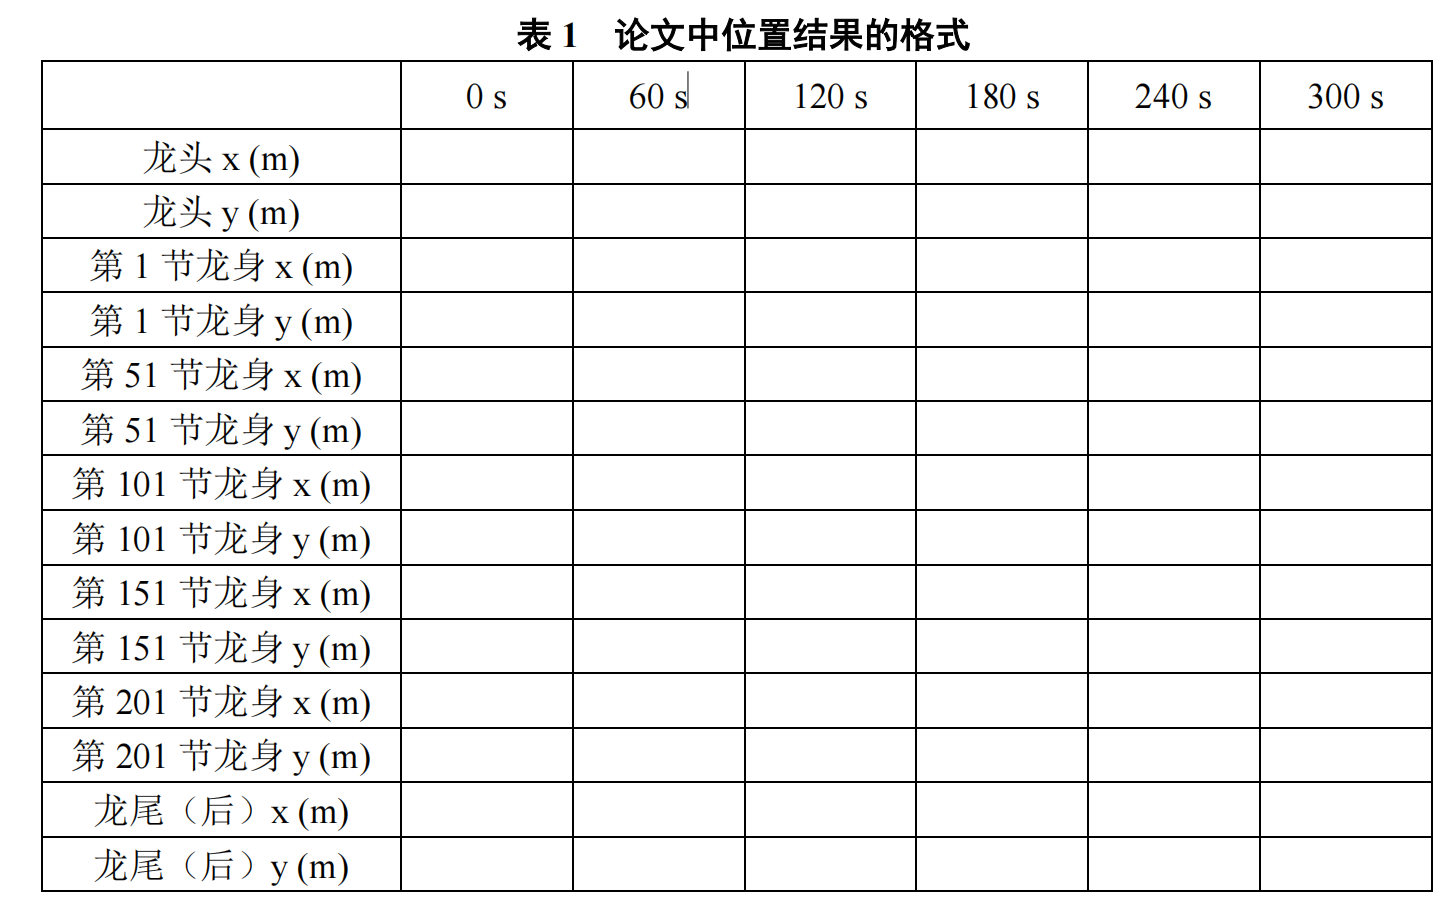
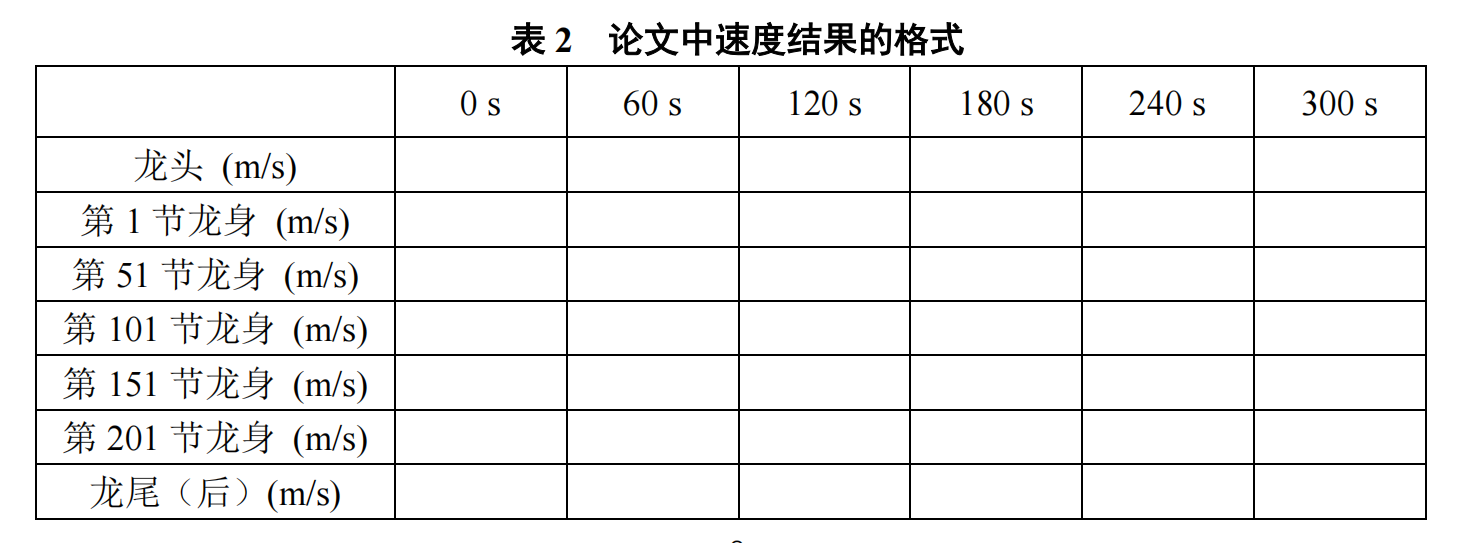

**测试：保存某一时刻的位置数据**

In [6]:
# 获取当前时间并格式化为字符串
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# 添加时间后缀到输出文件名，基于项目根目录
pos_output_file = f"../data/output/q1_positions_{current_time}.xlsx"
v_output_file = f"../data/output/q1_velocities_{current_time}.xlsx"

In [7]:
# 如果计算成功，保存位置数据
if 'pos_result' in locals() and pos_result:
    model.save_position(pos_result, pos_output_file)
    print(f"文件已保存到: {os.path.abspath(pos_output_file)}")
else:
    print("未计算到有效的连接点位置，无法保存数据。")

if 'v_result' in locals() and v_result:
    model.save_velocity(v_result, v_output_file)
    print(f"速度数据已保存到: {os.path.abspath(v_output_file)}")

位置数据已保存到: ../data/output/q1_positions_20250813_184753.xlsx
添加了时刻: 300.0 s
文件已保存到: e:\ywc大学\大三上\数模国赛\模拟\CUMCM2024_A\data\output\q1_positions_20250813_184753.xlsx
速度数据已保存到: ../data/output/q1_velocities_20250813_184753.xlsx
添加了时刻: 300.0 s
速度数据已保存到: e:\ywc大学\大三上\数模国赛\模拟\CUMCM2024_A\data\output\q1_velocities_20250813_184753.xlsx


## 批量追踪轨迹

使用trace_period方法追踪300s内的板凳龙运动轨迹，自动保存每秒的位置和速度数据

In [5]:
# 测试trace_period方法 - 追踪较短时间段以便快速验证
print("开始测试trace_period方法...")

# 设置测试参数（使用较短的时间段进行测试）
trace_theta_start = 32.0 * pi  # 起始极角
trace_max_time = 300            # 追踪300秒
trace_velocity = 1.0           # 速度 (m/s)
trace_step = 0.01             # 步长

print(f"测试参数:")
print(f"起始极角: {trace_theta_start} rad")
print(f"追踪时间: 0-{trace_max_time} s")
print(f"速度: {trace_velocity} m/s")
print(f"步长: {trace_step}")

try:
    # 调用trace_period方法
    trajectory_result = model.trace_period(
        theta_start=trace_theta_start,
        max_time=trace_max_time,
        v=trace_velocity,
        step=trace_step
    )
    
    print(f"\n批量追踪完成!")
    print(f"总计算时间点: {trajectory_result['total_time_points']}")
    print(f"位置数据文件: {trajectory_result['position_file']}")
    print(f"速度数据文件: {trajectory_result['velocity_file']}")
    
except Exception as e:
    print(f"trace_period方法执行时发生错误: {e}")
    import traceback
    traceback.print_exc()

开始测试trace_period方法...
测试参数:
起始极角: 100.53096491487338 rad
追踪时间: 0-300 s
速度: 1.0 m/s
步长: 0.01
开始追踪板凳龙轨迹，时间范围: 0-300秒
起始极角: 100.5310 rad
速度: 1.0 m/s
位置数据已保存到: ../data/output\trajectory_positions_20250813_193304.xlsx
添加了时刻: 0 s
速度数据已保存到: ../data/output\trajectory_velocities_20250813_193304.xlsx
添加了时刻: 0 s
已完成 t=0s 的计算
位置数据已保存到: ../data/output\trajectory_positions_20250813_193304.xlsx
添加了时刻: 1 s
速度数据已保存到: ../data/output\trajectory_velocities_20250813_193304.xlsx
添加了时刻: 1 s
位置数据已保存到: ../data/output\trajectory_positions_20250813_193304.xlsx
添加了时刻: 2 s
速度数据已保存到: ../data/output\trajectory_velocities_20250813_193304.xlsx
添加了时刻: 2 s
位置数据已保存到: ../data/output\trajectory_positions_20250813_193304.xlsx
添加了时刻: 3 s
速度数据已保存到: ../data/output\trajectory_velocities_20250813_193304.xlsx
添加了时刻: 3 s
位置数据已保存到: ../data/output\trajectory_positions_20250813_193304.xlsx
添加了时刻: 2 s
速度数据已保存到: ../data/output\trajectory_velocities_20250813_193304.xlsx
添加了时刻: 2 s
位置数据已保存到: ../data/output\trajectory_positions_20250813_1